In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Папка images создана


In [8]:
#задание 0
df = pd.read_csv('/adult_data.csv')
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
#задание 1
gender_counts = df['sex'].value_counts()
print("Количество мужчин:", gender_counts['Male'])
print("Количество женщин:", gender_counts['Female'])

Количество мужчин: 21790
Количество женщин: 10771


In [10]:
#задание 2
male_avg_age = df[df['sex'] == 'Male']['age'].mean()
print("Средний возраст мужчин:", round(male_avg_age, 2))

Средний возраст мужчин: 39.43


In [ ]:
#задание 3
taiwan_count = df[df['native-country'] == 'Taiwan'].shape[0]
total_count = df.shape[0]
taiwan_percentage = (taiwan_count / total_count) * 100
print(f"Процент граждан Тайваня: {taiwan_percentage:.4f}%")
print(f"Абсолютное количество: {taiwan_count} из {total_count}")

Процент граждан Тайваня: 0.1566%
Абсолютное количество: 51 из 32561


In [ ]:
#задание 4
high_income_avg_age = df[df['salary'] == '>50K']['age'].mean()
print("Средний возраст людей с доходом >50K:", round(high_income_avg_age, 2))

Средний возраст людей с доходом >50K: 44.25


In [ ]:
#задание 5
high_income_std_age = df[df['salary'] == '>50K']['age'].std()
print("Стандартное отклонение возраста людей с доходом >50K:", round(high_income_std_age, 2))

Стандартное отклонение возраста людей с доходом >50K: 10.52


In [ ]:
#задание 6
high_income_education = df[df['salary'] == '>50K']['education']
non_bachelors = high_income_education[~high_income_education.isin(['Bachelors', 'Masters', 'Doctorate', 'Prof-school'])]

if len(non_bachelors) == 0:
    print("ДА, все люди с доходом >50K имеют образование Bachelors+")
else:
    print("НЕТ, не все люди с доходом >50K имеют образование Bachelors+")


НЕТ, не все люди с доходом >50K имеют образование Bachelors+


In [ ]:
#задание 7
condition = (df['hours-per-week'] == 40) & (df['native-country'] == 'United-States') & (df['salary'] == '<=50K')
result = df[condition].shape[0]
print("Количество человек, работающих 40 часов, граждан США с доходом <=50K:", result)

Количество человек, работающих 40 часов, граждан США с доходом <=50K: 10493


In [ ]:
#задание 8
max_hours = df['hours-per-week'].max()
print("Максимальное количество часов в неделю:", max_hours)

condition = (df['hours-per-week'] == max_hours) & (df['salary'] == '<=50K')
result = df[condition].shape[0]
total_max_hours = df[df['hours-per-week'] == max_hours].shape[0]

print(f"Количество человек, работающих {max_hours} часов и зарабатывающих <=50K:", result)

Максимальное количество часов в неделю: 99
Количество человек, работающих 99 часов и зарабатывающих <=50K: 60


/tmp/ipython-input-1819656342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')


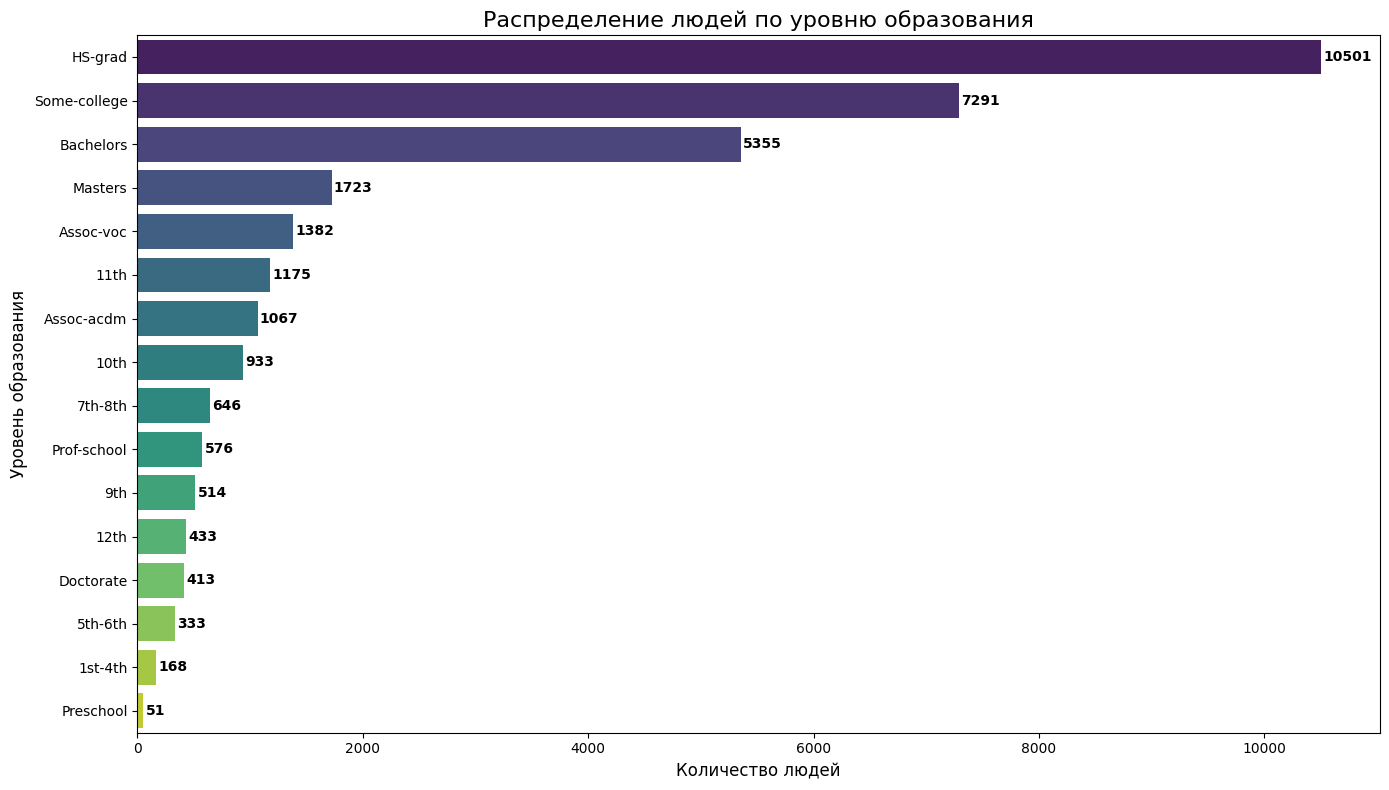

Образование с наибольшим представлением: 'HS-grad' - 10501 человек


<Figure size 640x480 with 0 Axes>

In [14]:
#задание 9
plt.figure(figsize=(14, 8))
education_counts = df['education'].value_counts()

# Строим barplot
ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')
plt.title('Распределение людей по уровню образования', fontsize=16)
plt.xlabel('Количество людей', fontsize=12)
plt.ylabel('Уровень образования', fontsize=12)

# Добавляем значения на столбцы
for i, v in enumerate(education_counts.values):
    ax.text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Находим образование с максимальным количеством людей
most_common_education = education_counts.idxmax()
most_common_count = education_counts.max()
print(f"Образование с наибольшим представлением: '{most_common_education}' - {most_common_count} человек")
# Сохраняем в папку images
plt.savefig('images/education_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

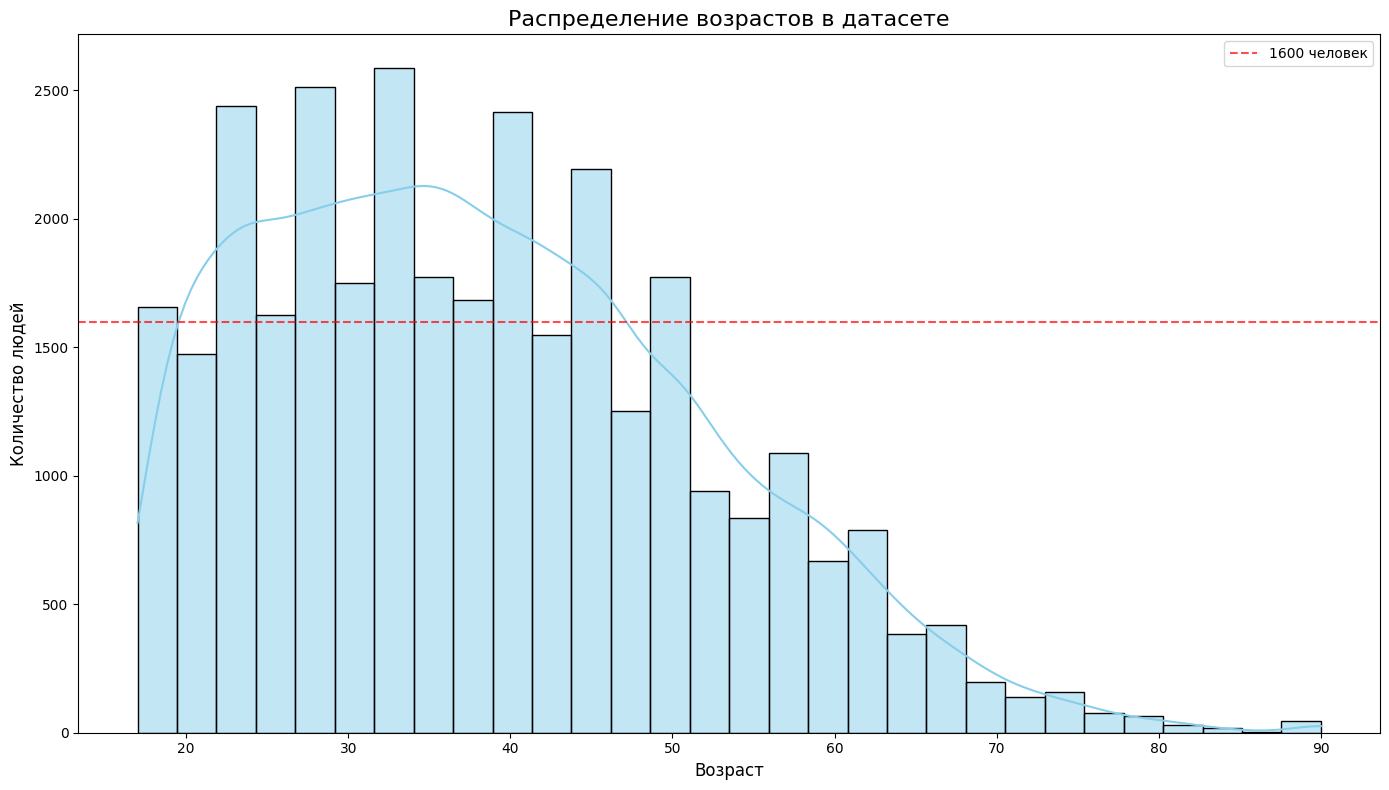

Количество возрастных отрезков с более чем 1600 значениями: 11

Детальная информация:
Отрезок 1: [17.0-19.4) лет - 1657 человек
Отрезок 3: [21.9-24.3) лет - 2440 человек
Отрезок 4: [24.3-26.7) лет - 1626 человек
Отрезок 5: [26.7-29.2) лет - 2515 человек
Отрезок 6: [29.2-31.6) лет - 1749 человек
Отрезок 7: [31.6-34.0) лет - 2589 человек
Отрезок 8: [34.0-36.5) лет - 1774 человек
Отрезок 9: [36.5-38.9) лет - 1685 человек
Отрезок 10: [38.9-41.3) лет - 2418 человек
Отрезок 12: [43.8-46.2) лет - 2195 человек
Отрезок 14: [48.6-51.1) лет - 1774 человек


In [ ]:
#задание 10
plt.figure(figsize=(14, 8))

# Строим гистограмму распределения возрастов
ax = sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Распределение возрастов в датасете', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)

# Добавляем горизонтальную линию на уровне 1600
plt.axhline(y=1600, color='red', linestyle='--', alpha=0.7, label='1600 человек')
plt.legend()

plt.tight_layout()
plt.show()

# Анализируем гистограмму программно
counts, bins = np.histogram(df['age'], bins=30)
bins_above_1600 = sum(counts > 1600)

print(f"Количество возрастных отрезков с более чем 1600 значениями: {bins_above_1600}")
print("\nДетальная информация:")
for i, (count, bin_start, bin_end) in enumerate(zip(counts, bins[:-1], bins[1:])):
    if count > 1600:
        print(f"Отрезок {i+1}: [{bin_start:.1f}-{bin_end:.1f}) лет - {count} человек")

In [15]:
import os

# Создаем папку images если ее нет
if not os.path.exists('images'):
    os.makedirs('images')
    print("Папка images создана")
else:
    print("Папка images уже существует")

Папка images уже существует


/tmp/ipython-input-4183973831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')


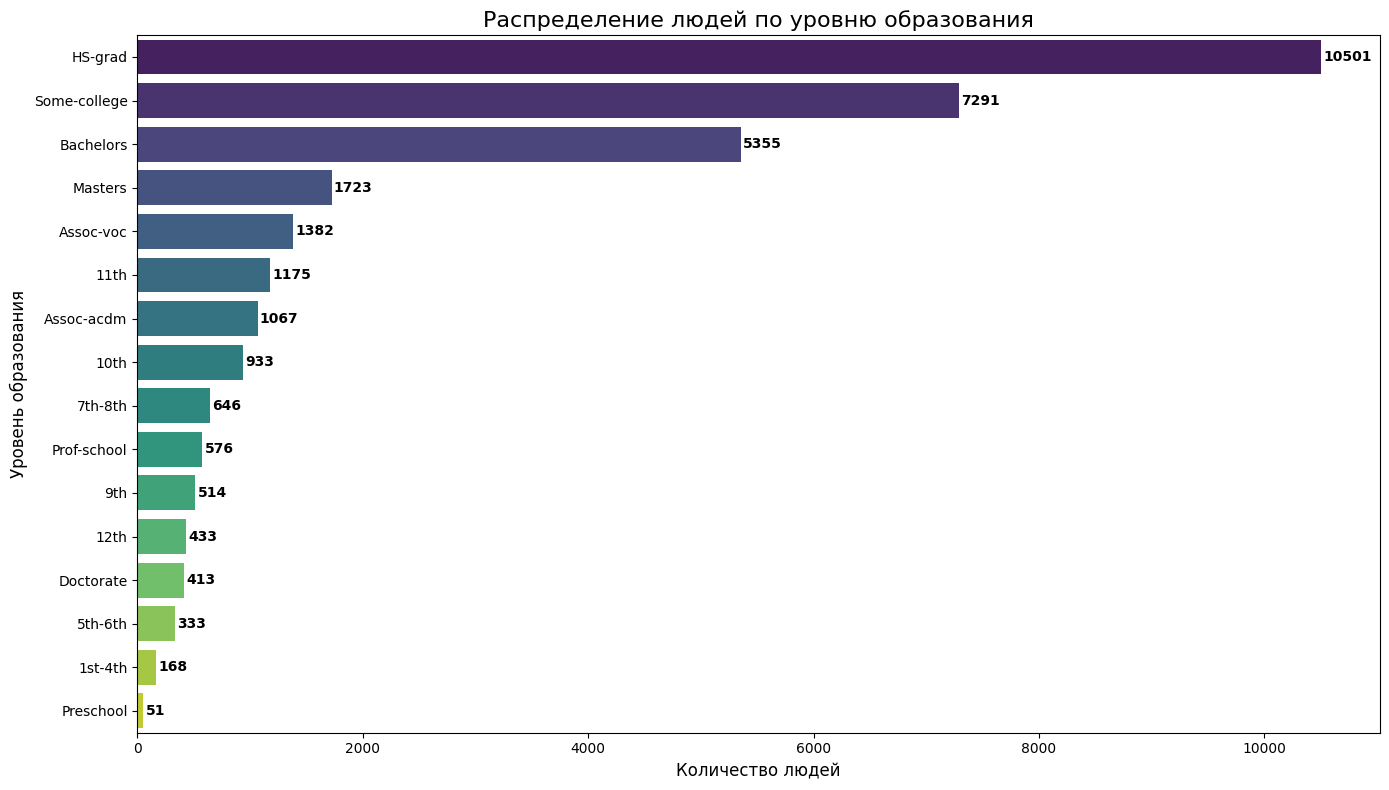

/tmp/ipython-input-4183973831.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')


Образование с наибольшим представлением: 'HS-grad' - 10501 человек


In [16]:
#задание 9

plt.figure(figsize=(14, 8))
education_counts = df['education'].value_counts()

ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')
plt.title('Распределение людей по уровню образования', fontsize=16)
plt.xlabel('Количество людей', fontsize=12)
plt.ylabel('Уровень образования', fontsize=12)

for i, v in enumerate(education_counts.values):
    ax.text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=education_counts.values, y=education_counts.index, palette='viridis')
plt.title('Распределение людей по уровню образования', fontsize=16)
plt.xlabel('Количество людей', fontsize=12)
plt.ylabel('Уровень образования', fontsize=12)

for i, v in enumerate(education_counts.values):
    ax.text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('images/education_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()  # Закрываем фигуру после сохранения

# Вывод результата
most_common_education = education_counts.idxmax()
most_common_count = education_counts.max()
print(f"Образование с наибольшим представлением: '{most_common_education}' - {most_common_count} человек")